<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/week6/K_Means_Clustering_with_Another_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizka Rahmadina

NIM : 1103204115

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Country-data.csv')

In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.drop(['country'], axis=1, inplace=True)
print(df)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

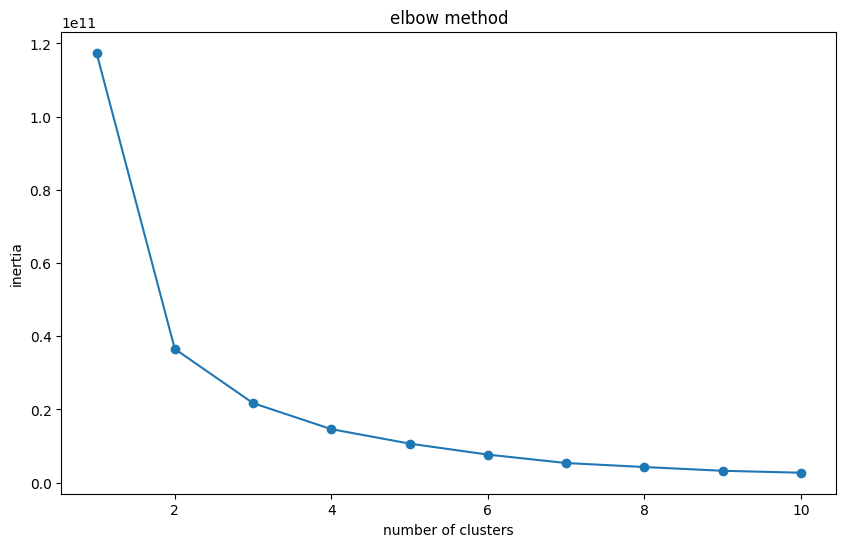

In [ ]:
inertia = []

column = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(column)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

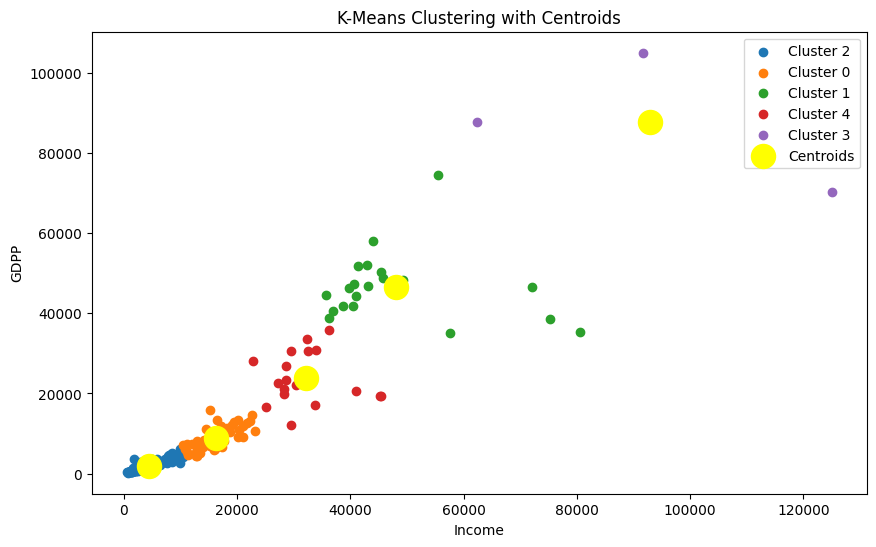

In [ ]:
column = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)

df['label'] = kmeans.fit_predict(column)

plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['income'], df[df['label'] == label]['gdpp'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 8], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.legend()
plt.show()

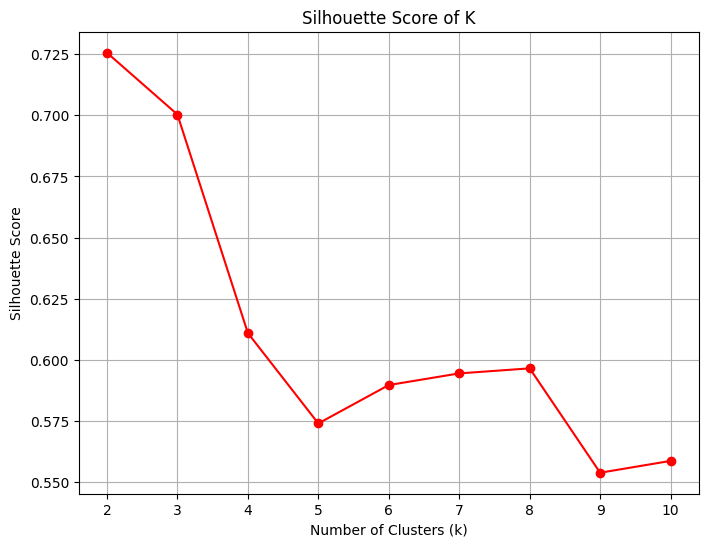



Silhouette Score for k = 2: 0.7256314906273207
Silhouette Score for k = 3: 0.7003508054481694
Silhouette Score for k = 4: 0.6109297437247547
Silhouette Score for k = 5: 0.573947530924095
Silhouette Score for k = 6: 0.589653373502461
Silhouette Score for k = 7: 0.5944253756384579
Silhouette Score for k = 8: 0.5964827694227414
Silhouette Score for k = 9: 0.5537820350311363
Silhouette Score for k = 10: 0.5586186813122731


In [ ]:
column = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# Membuat list kosong untuk menampung nilai silhouette score
silhouette_scores = []

# Melakukan perulangan untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(column)
    silhouette_avg = silhouette_score(column, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
print("\n")

# Menampilkan nilai silhouette score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k = {k}: {score}")


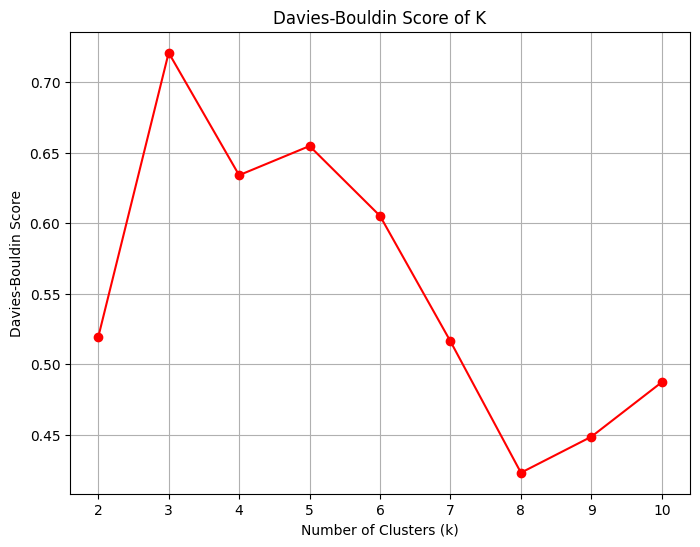



Davies-Bouldin Score for k = 2: 0.5190307920490919
Davies-Bouldin Score for k = 3: 0.7207707749867965
Davies-Bouldin Score for k = 4: 0.633935074648727
Davies-Bouldin Score for k = 5: 0.6546245394502249
Davies-Bouldin Score for k = 6: 0.6050687566195976
Davies-Bouldin Score for k = 7: 0.5161053990901753
Davies-Bouldin Score for k = 8: 0.4230016755537408
Davies-Bouldin Score for k = 9: 0.44854568400571654
Davies-Bouldin Score for k = 10: 0.4872063776853054


In [ ]:
column = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(column)
    davies_bouldin = davies_bouldin_score(column, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()
print("\n")

for k, score in zip(range(2, 11), davies_bouldin_scores):
    print(f"Davies-Bouldin Score for k = {k}: {score}")


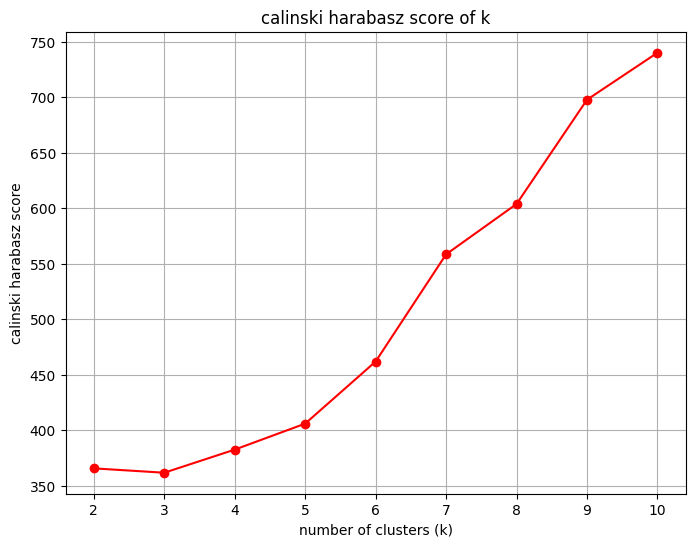



calinski harabasz score for k = 2: 365.5694975437895
calinski harabasz score for k = 3: 361.64814319288297
calinski harabasz score for k = 4: 382.4678109667105
calinski harabasz score for k = 5: 405.8844664700686
calinski harabasz score for k = 6: 461.8357565728194
calinski harabasz score for k = 7: 558.3901848379506
calinski harabasz score for k = 8: 603.7419962071724
calinski harabasz score for k = 9: 697.6703447866385
calinski harabasz score for k = 10: 739.9935480186193


In [ ]:
column = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

calinski_harabasz_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(column)
    calinski_harabasz = calinski_harabasz_score(column, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)

#menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, calinski_harabasz_scores, marker='o', linestyle='-', color='r')
plt.title('calinski harabasz score of k')
plt.xlabel('number of clusters (k)')
plt.ylabel('calinski harabasz score')
plt.grid(True)
plt.show()
print("\n")

for k, score in zip(range(2, 11), calinski_harabasz_scores):
    print(f"calinski harabasz score for k = {k}: {score}")